In [1]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# loading data

In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\2. eda_n_dataCleaning\3. cleaned_data.csv')
data.sample(3)

,target,text_msg
1796,ham,"Sir, i am waiting for your call."
4480,ham,The guy at the car shop who was flirting with ...
3779,ham,Wat time Ì_ wan today?


# target col encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
data.head()


,target,text_msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# constructing new_features from `text_msg` col

#### loading nltk tools

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarvesh.kesharwani\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
data.sample(3)

,target,text_msg
60,0,Your gonna have to pick up a $1 burger for you...
3876,0,And by when you're done I mean now
1187,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...


#### `num_characters` col construction

In [7]:
data['num_characters'] = data['text_msg'].apply(len)
data.sample(3)

,target,text_msg,num_characters
4320,0,They finally came to fix the ceiling.,37
2937,0,Olol i printed out a forum post by a guy with ...,139
2037,0,Well I wasn't available as I washob nobbing wi...,107


#### `num_words` col construction

In [36]:
data['num_words'] = data['text_msg'].apply(lambda x: len(nltk.word_tokenize(str(x))))
data.sample(3)

,target,text_msg,num_characters,num_sentences,clean_mail,num_words
1102,0,"Height of \Oh shit....!!\"" situation: A guy th...",114,2,height oh shit situat guy throw luv letter gal...,29
3561,0,Let me know if you need anything else. Salad o...,98,2,let know need anyth els salad desert someth ma...,22
5105,0,Apo all other are mokka players only,36,1,apo mokka player,7


#### `num_sentences` col construction

In [37]:
data['num_sentences'] = data['text_msg'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head(3)

,target,text_msg,num_characters,num_sentences,clean_mail,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...,24
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...,37


#### checking if newly constructed features truly help in differentiating categories or not

##### checking stats for ham and spam classes, if they are differentiating factors or not

In [38]:
# ham and spam
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# ham
data[data['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# spam
data[data['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
# stats of ham and spam msgs clearly looks different, which make it identifying factor for classification.
# so next we can try plotting these stats to see it visually and more clearly.

##### checking same dist. to check same thing visually

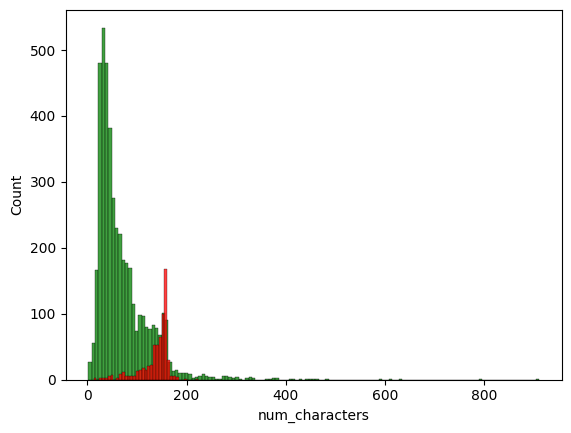

In [42]:
# hist comparison of num of characters in both categories
sns.histplot(data[data['target']==0]['num_characters'], color='g')
sns.histplot(data[data['target']==1]['num_characters'], color='r')
plt.show()

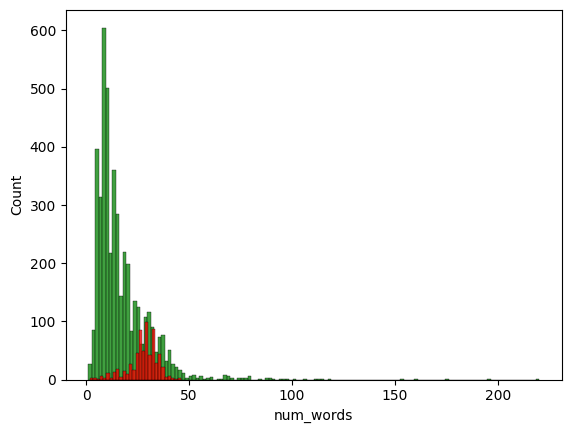

In [43]:
# hist comparison of num of words in both categories
sns.histplot(data[data['target']==0]['num_words'], color='g')
sns.histplot(data[data['target']==1]['num_words'], color='r')
plt.show()

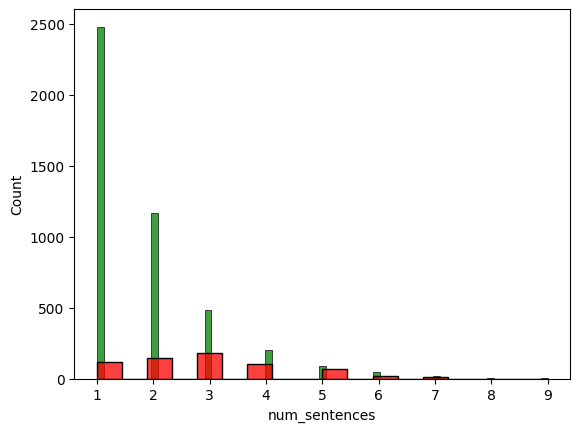

In [44]:
# hist comparison of num of sentences in both categories
sns.histplot(data[(data['target']==0) & (data['num_sentences']<10)]['num_sentences'], color='g')
sns.histplot(data[(data['target']==1) & (data['num_sentences']<10)]['num_sentences'], color='r')
plt.show()

***

# doing eda to perform feature selection

##### checking relationship b/w cols to select better features and drop non_imp features.

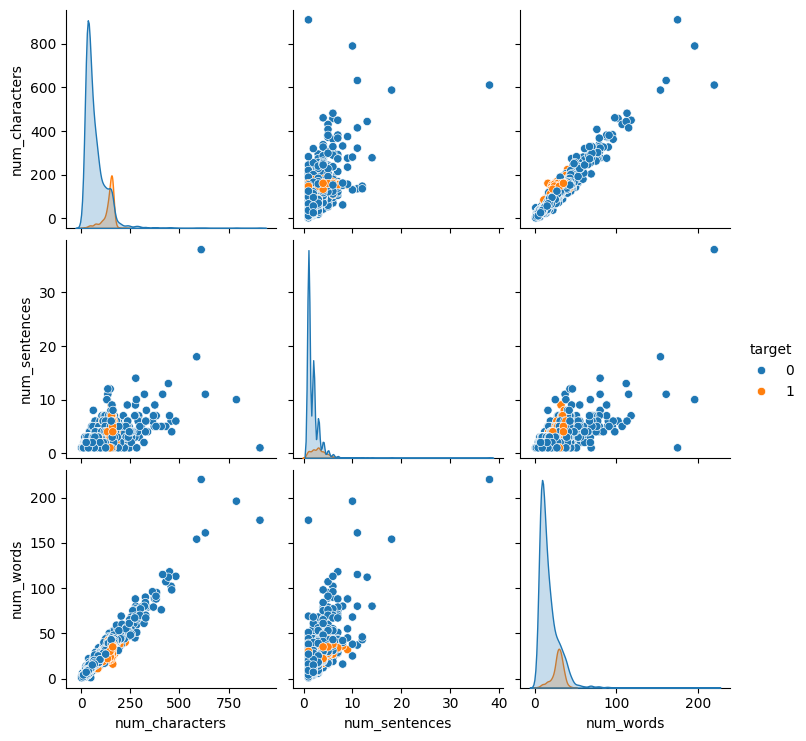

In [45]:
sns.pairplot(data, hue='target')

#### eda (corr plot) -> feature selection 

In [51]:
data1 = data.drop(columns=['text_msg', 'clean_mail'])

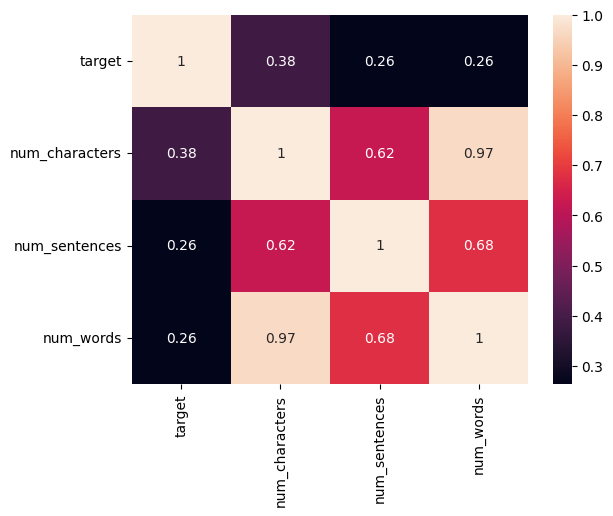

from corr plot, rel b/w num_characters & num_words seems really high and num_characters has very high correlation with target var, unlike num_words thus we can drop num_words col


In [54]:
sns.heatmap(data1.corr(), annot=True)
plt.show()
print('from corr plot, rel b/w num_characters & num_words seems really high and num_characters has very high correlation with target var, unlike num_words thus we can drop num_words col')

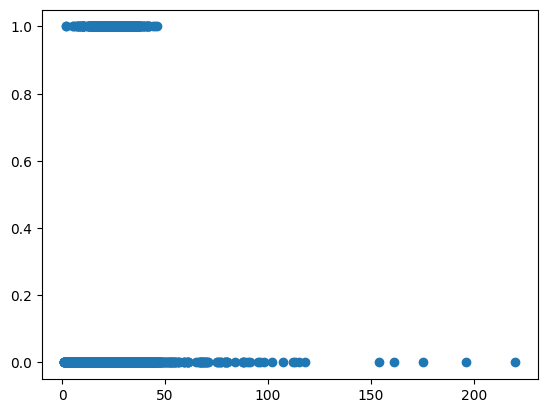

In [55]:
plt.scatter(x=data['num_words'], y=data['target'])

In [56]:
# dropping `num_words` col
data.drop(columns=['num_words'], axis=1, inplace=True)
data.head()

,target,text_msg,num_characters,num_sentences,clean_mail
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah nt think goe usf live around though


***

# feature construction using text_msg col

### preprocessing text_msg to create feature

In [57]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [60]:
def transform_text(text):
    translator = str.maketrans('', '', string.punctuation)
    ps = PorterStemmer()

    text = text.lower()
    text = nltk.word_tokenize(text)
    clean_text=[]
    for word in text:
        if word not in stopwords.words('english'):
            word = word.translate(translator)
            if word.isalnum():
                clean_text.append(ps.stem(word))
    return ' '.join(clean_text)

In [61]:
transform_text("sarvesh's dragon is playing game!")

'sarvesh s dragon play game'

In [62]:
data['clean_mail'] = data['text_msg'].apply(transform_text)

In [63]:
data.sample(3)

,target,text_msg,num_characters,num_sentences,clean_mail
3624,0,"Dont worry, 1 day very big lambu ji vl come..t...",77,1,dont worri 1 day big lambu ji vl come til enjo...
3599,0,Hi. I'm always online on yahoo and would like ...,70,2,hi m alway onlin yahoo would like chat someday
1627,0,Okay... We wait ah,18,1,okay wait ah


In [66]:
data = data[['text_msg', 'clean_mail', 'num_characters', 'num_sentences', 'target']]
data.head()

,text_msg,clean_mail,num_characters,num_sentences,target
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,2,0
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,2,1
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,1,0
4,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,61,1,0


In [67]:
data['clean_mail'].iloc[4]

'nah nt think goe usf live around though'

In [68]:
data.sample(5)

,text_msg,clean_mail,num_characters,num_sentences,target
4628,You can donate å£2.50 to UNICEF's Asian Tsunam...,donat unicef s asian tsunami disast support fu...,137,1,1
1844,Becoz its &lt;#&gt; jan whn al the post ofic...,becoz lt gt jan whn al post ofic holiday cn go...,108,1,0
3937,Are you happy baby ? Are you alright ? Did you...,happi babi alright take job hope fine send kis...,154,5,0
1599,I dont have any of your file in my bag..i was ...,dont file bag work call mei ll tell find anyth...,118,1,0
3733,Free video camera phones with Half Price line ...,free video camera phone half price line rental...,146,2,1


In [69]:
data.drop(columns=['text_msg'], axis=1, inplace=True)

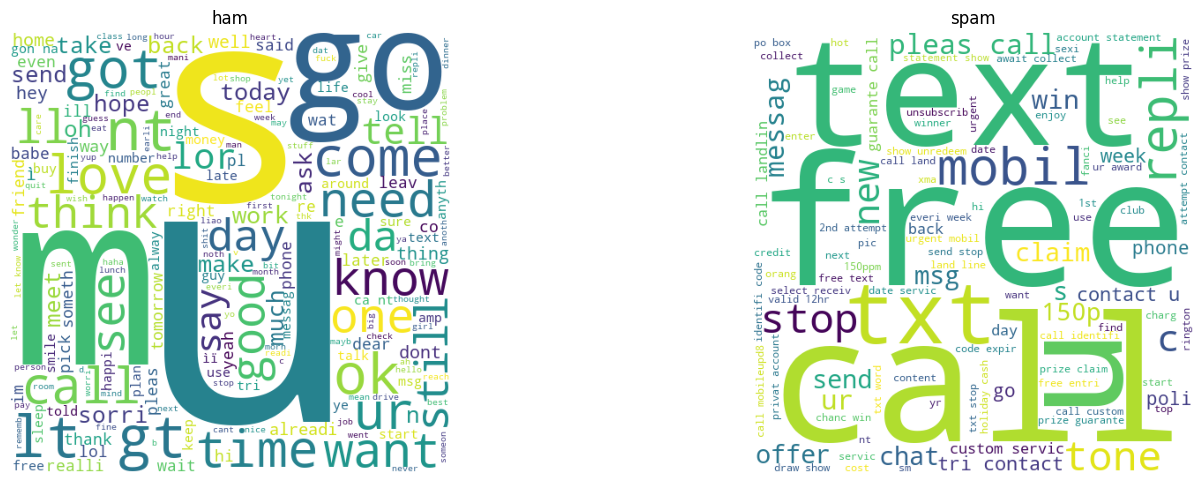

so we can see that the words used in ham_mails and spam_mails are NOT SAME,
which will help in identifying both kind of mails distinctivly.


In [84]:
from wordcloud import WordCloud

wc1 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
wc2 = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
ham_wc = wc1.generate(data[data['target']==0]['clean_mail'].str.cat(sep=' '))
spam_wc = wc2.generate(data[data['target']==1]['clean_mail'].str.cat(sep=' '))

figure, axis = plt.subplots(1, 2, figsize=(15,5))
plt.tight_layout()
axis[0].imshow(ham_wc)
axis[0].axis("off")
axis[0].set_title("ham")


axis[1].imshow(spam_wc)
axis[1].axis("off")
axis[1].set_title("spam")
plt.show()
print("""so we can see that the words used in ham_mails and spam_mails are NOT SAME,
which will help in identifying both kind of mails distinctivly.""")

In [ ]:
# so this means we can use this col to predict the target class.

### lets check the top 25 cols that are most frequent in both categories of mails.
this will help us to predict both categories distinctively

In [73]:
spam_corpus = []
for msg in data[data['target'] == 1]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        spam_corpus.append(word)

len(spam_corpus), spam_corpus

(10775,
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  's',
  'appli',
  '08452810075over18',
  's',
  'freemsg',
  'hey',
  'darl',
  's',
  '3',
  'week',
  's',
  'word',
  'back',
  'd',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv',
  'winner',
  'valu',
  'network',
  'custom',
  'select',
  'receivea',
  'prize',
  'reward',
  'claim',
  'call',
  '09061701461',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hour',
  'mobil',
  '11',
  'month',
  'u',
  'r',
  'entitl',
  'updat',
  'latest',
  'colour',
  'mobil',
  'camera',
  'free',
  'call',
  'mobil',
  'updat',
  'co',
  'free',
  '08002986030',
  'six',
  'chanc',
  'win',
  'cash',
  '100',
  '20000',
  'pound',
  'txt',
  'csh11',
  'send',
  '87575',
  'cost',
  '150pday',
  '6day',
  '16',


In [75]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(25))

,0,1
0,call,321
1,free,191
2,2,157
3,txt,141
4,u,135
5,text,122
6,ur,119
7,mobil,114
8,stop,106
9,repli,103


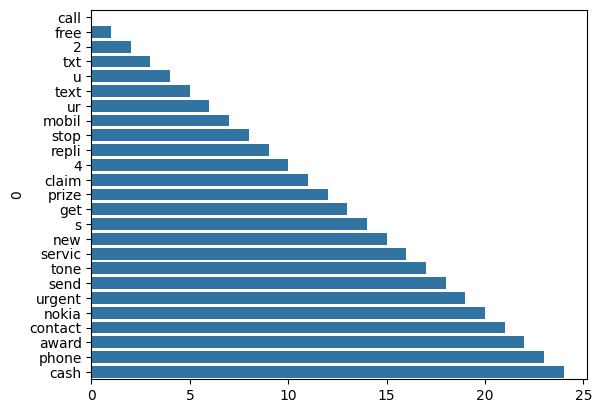

In [76]:
# spam
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(25))[0])
plt.show()

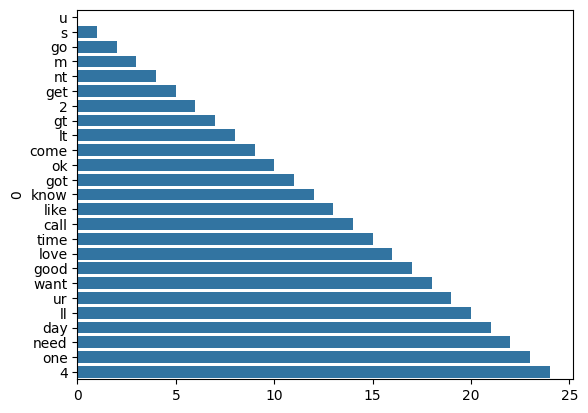

In [78]:
# ham
ham_corpus = []
for msg in data[data['target'] == 0]['clean_mail'].to_list():
    for word in msg.split():
        # if word not in spam_corpus:
        ham_corpus.append(word)

len(ham_corpus), ham_corpus

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(25))[0])
plt.show()

In [80]:
data.to_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\3. eda_n_featureEngineering\FEed_data.csv', index=False)